# Features engineering

# Load the data

In [1]:
import sys
sys.path.append('/Users/badr/github_projects')

In [2]:
from fortinet_hacker_rank_interview.python_question.src.loading_data import load_data
data = load_data()
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Feature Transformation


##  Categorical feature transformation into numerical

In [3]:
from fortinet_hacker_rank_interview.python_question.src.util import ordinal_encoding_to_replace_categorical_features, one_hot_encoding_to_replace_categorical_features


col_name = 'Education'
mapper = {'Graduate': 1, 'Not Graduate': 2}
data = ordinal_encoding_to_replace_categorical_features(data, col_name, mapper)
# or we can use: data[col_name] = data[col_name].cat.codes

col_list = ['Gender', 'Married', 'Property_Area', 'Dependents']
data = one_hot_encoding_to_replace_categorical_features(data, col_list)

## Feature distribution


<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

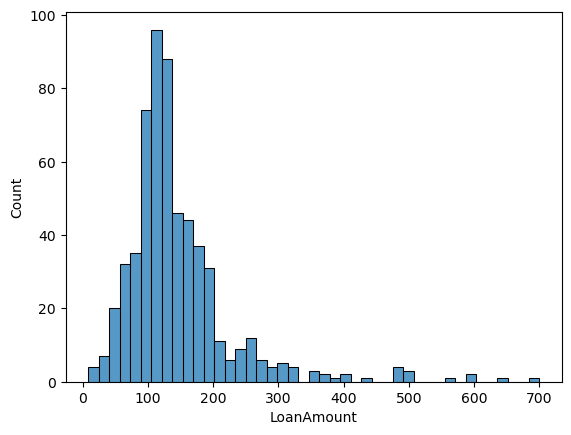

In [5]:
import seaborn as sns
sns.histplot(data["LoanAmount"])

**Interpretation**

As you can see the distribution is skewed to the right. Because of the outliers, we see that the tail is longer (high numbers).
It is possible to deal with that particularity with a log transformation on the data. This transformation will not affect the data distribution properties, it will only reduce the large values on the figure.

## Log transformation 

<AxesSubplot:>

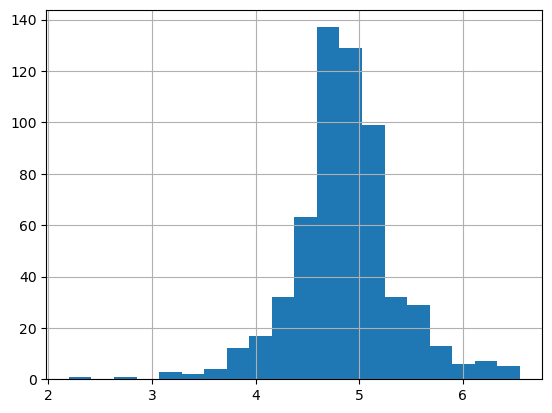

In [6]:
from fortinet_hacker_rank_interview.python_question.src.util import feature_log_transformation

column_to_log_transform = ["LoanAmount"]
for column in column_to_log_transform:
    data = feature_log_transformation(data, column)
    
data[column+'_log'].hist(bins=20)

## Feature creation

It is very helpful to use our knowledge and expertise in the application domaine to derive new features that will help the machine learning model to perform better than using raw features. 
The set of features that we want to create are the following:

1- Total_income = applicant_income + coapplicant_income
2- EMI = LoanAmount / Loan_Amount_Term
3- Balance_Income = TotalIncome - EMI*1000

In [ ]:
# 1- Total_income = applicant_income + coapplicant_income
data["total_income"] = data["ApplicantIncome"]+data["CoapplicantIncome"]
data = feature_log_transformation(data, "total_income")
# 2- EMI = LoanAmount / Loan_Amount_Term
data["EMI"] = data["LoanAmount"]/data["Loan_Amount_Term"]
# 3- Balance_Income = TotalIncome - EMI*1000
data["Balance_Income"] = data["total_income"]-data["EMI"]*1000 # To make the units equal we multiply with 1000
# delete not useful columns
data = data.drop(["Loan_ID","ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"],axis=1)